# Image filters
## Part II
This notebook shows how to handle convolutional and other image filters in **SlideIO**. Introduction to image filter is present in **color-filters** notebook.
Currently the following filters are supported by the library:
- Color filters
- Gaussian blur filter
- Median blur filter
- Sobel filter
- Scharr filter
- Laplacian filter
- Bilateral filter
- Canny filter

In [2]:
import slideio
from utils import get_test_images, display_test_image_info, show_images, show_image, get_driver_test_images, delete_file, show_scenes, show_scene_info, show_scene_info_tables, create_output_file_path

## Load original scene
The following code load a **Scene** object that will be used in future demonstation

Property,Value
Name,Image
File Path,./images/CMU-1-Small-Region.svs
"Size (Width, Height)","(2220, 2967)"
Number of Channels,3
Compression,Compression.Jpeg
Data Type,uint8
Magnification,20.0
Resolution,"(4.99e-07, 4.99e-07)"
Z-Resolution,0.0
Time Resolution,0.0


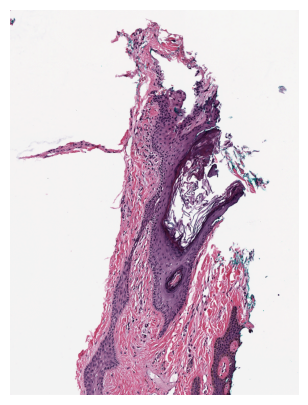

In [3]:
# Load input scene from a scn file
input_path =  get_driver_test_images("SVS")[0]
scene = slideio.open_slide(input_path, 'AUTO').get_scene(0)
# Display scene information
show_scene_info(scene)
show_image(scene.read_block(), 500)

## Gaussian blur filter
The Gaussian blur filter is a widely used image filtering technique that helps to reduce noise and smooth out an image while preserving important details. It applies a weighted average to each pixel in the image, with the weights determined by a Gaussian distribution. This creates a blur effect that spreads the intensity of each pixel to its surrounding neighbors.

The Gaussian blur filter the following parameters:

1. **kernel_size_x** and **kernel_size_y** (`int`): These parameters specifies the size of the kernel or the window along x and y axis used for blurring. It determines the range of neighboring pixels considered when calculating the weighted average. A larger kernel size will result in a stronger blur effect but may also cause more loss of detail.

2. **sigma_x** and **sigma_y** (`double`): The standard deviations along x and y axes determines the spread or intensity of the Gaussian distribution. It controls the amount of blurring applied to each pixel. A higher standard deviation value will result in a more significant blur effect.

By adjusting these parameters, users can control the level of blurring applied to an image, balancing the reduction of noise with the preservation of important details. It is important to find an optimal combination of kernel size and standard deviation based on the characteristics of the image and the specific analysis requirements.

The Gaussian blur filter is commonly used in various image processing tasks, such as image denoising, edge detection, and smoothing prior to further analysis or feature extraction. Its versatility and effectiveness make it a valuable tool in image analysis workflows.

Property,Value
Name,Image
File Path,./images/CMU-1-Small-Region.svs
"Size (Width, Height)","(2220, 2967)"
Number of Channels,3
Compression,Compression.Jpeg
Data Type,uint8
Magnification,20.0
Resolution,"(4.99e-07, 4.99e-07)"
Z-Resolution,0.0
Time Resolution,0.0


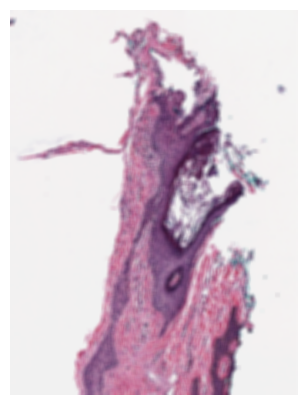

In [4]:
blur_transformation = slideio.GaussianBlurFilter()
blur_transformation.kernel_size_x = 7
blur_transformation.kernel_size_y = 7
blur_transformation.sigma_x = 4.5
blur_transformation.sigma_y = 3.2
transformed_scene =scene.apply_transformation([blur_transformation])
image = transformed_scene.read_block(size=(0,500))
# Display scene information
show_scene_info(transformed_scene)
show_image(image, 500)

## Median blur filter
The median blur filter is a popular image filtering technique used to reduce noise and smooth out an image while preserving edges and details. Unlike the Gaussian blur filter that applies a weighted average, the median blur filter replaces each pixel value with the median value of its neighboring pixels within a specified kernel size.

The median blur filter has one primary parameter:

**kernel_size** (`int`): This parameter determines the size of the kernel or the window used for blurring. It specifies the range of neighboring pixels considered when calculating the median value. The kernel size should be an odd integer (e.g., 3, 5, 7) to ensure a well-defined center pixel. A larger kernel size will result in a stronger blur effect but may also lead to more loss of fine details.

By adjusting the kernel size, users can control the extent of blurring applied to the image. A larger kernel size encompasses a wider range of neighboring pixels, resulting in a more significant reduction of noise and smoother image appearance.

The median blur filter is particularly effective in reducing salt-and-pepper noise, where random isolated bright or dark pixels appear in an image. It works by replacing these noisy pixels with the median value from the surrounding pixels, effectively smoothing out the noise while preserving the overall structure.

The median blur filter is commonly used in various image processing applications, including image denoising, removing small artifacts, and preparing images for further analysis or feature extraction. Its ability to preserve edges and details makes it a valuable tool in image analysis workflows, especially when dealing with images corrupted by impulsive noise.

Property,Value
Name,Image
File Path,./images/CMU-1-Small-Region.svs
"Size (Width, Height)","(2220, 2967)"
Number of Channels,3
Compression,Compression.Jpeg
Data Type,uint8
Magnification,20.0
Resolution,"(4.99e-07, 4.99e-07)"
Z-Resolution,0.0
Time Resolution,0.0


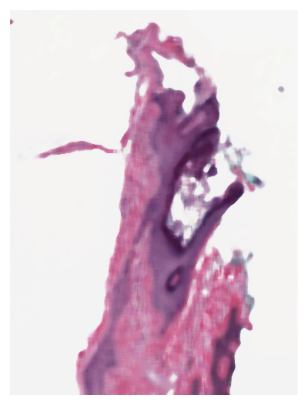

In [6]:
transformation = slideio.MedianBlurFilter()
transformation.kernel_size = 9
transformed_scene =scene.apply_transformation([transformation])
image = transformed_scene.read_block(size=(0,500))
# Display scene information
show_scene_info(transformed_scene)
show_image(image, 500)

## Soblel filter

The Sobel filter is an edge detection filter widely used in image processing and computer vision applications. It calculates the gradient of the image intensity at each pixel, highlighting areas of significant intensity changes, which typically correspond to edges or boundaries between different regions in the image. The Sobel filter can be applied in both the horizontal and vertical directions to detect edges along both axes.

The Sobel filter has the following parameters:

- **depth** (`DataType`): This parameter specifies the desired depth of the output image. It determines the data type of the gradient magnitude image calculated by the Sobel filter. Typical options include `DataType.Int16` (16-bit signed integer), `DataType.Float32` (32-bit floating-point), or `DataType.Float64` (64-bit floating-point). The choice of ddepth depends on the desired precision and range of the output gradient image.

- **dx** and **dy** (`int`): These parameters represent the order of the derivatives to be calculated. The Sobel filter computes the image gradient by convolving the image with two separate kernels: one for the horizontal direction (dx) and one for the vertical direction (dy). By specifying the derivative order, you can control the orientation of the edges detected. Setting dx=1 and dy=0 calculates the horizontal derivative, while dx=0 and dy=1 calculates the vertical derivative. Setting both dx and dy to 1 computes the gradient magnitude in both directions.

- **kernel_size** (`int`): The **kernel_size** parameter determines the size of the Sobel kernel. It specifies the dimensions of the square-shaped kernel used for filtering. Common kernel sizes are 3, 5, and 7. A larger kernel size captures more details but also increases computational complexity. The choice of ksize depends on the desired level of detail in the edge detection.

- **scale** and **delta** (`double`): These parameters control the scaling factor and the offset applied to the computed gradient values. The scale parameter scales the computed gradient values by a specified factor. It can be used to enhance or reduce the contrast of the detected edges. The delta parameter represents an optional value added to the scaled gradient values. It allows for additional adjustment of the output intensity range.

By adjusting these parameters, you can customize the Sobel filter to meet specific edge detection requirements in your image analysis tasks. The choice of ddepth, dx, dy, ksize, scale, and delta depends on the characteristics of the image and the desired edge detection outcome. Experimenting with different parameter settings can help fine-tune the edge detection results to best suit your application.

Property,Value
Name,Image
File Path,./images/CMU-1-Small-Region.svs
"Size (Width, Height)","(2220, 2967)"
Number of Channels,3
Compression,Compression.Jpeg
Data Type,int16
Magnification,20.0
Resolution,"(4.99e-07, 4.99e-07)"
Z-Resolution,0.0
Time Resolution,0.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


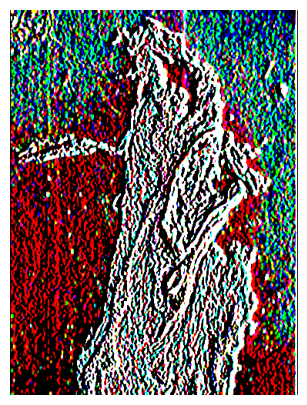

In [12]:
transformation = slideio.SobelFilter()
transformation.depth = slideio.DataType.Int16
transformation.kernel_size = 7
transformation.dx = 1
transformation.dy = 0
transformation.scale = 1.
transformation.delta = 0.
transformed_scene =scene.apply_transformation([transformation])
image = transformed_scene.read_block(size=(0,500))
# Display scene information
show_scene_info(transformed_scene)
show_image(image, 500)

## Scharr filter
The Scharr filter is another edge detection filter available in OpenCV that provides more accurate results compared to the Sobel filter. It uses a specific 3x3 kernel for computing the image gradient. Here are the parameters commonly used with the Scharr filter in OpenCV:

- **depth** (`DataType`): This parameter specifies the desired depth of the output image, similar to the Sobel filter. It determines the data type of the gradient magnitude image calculated by the Scharr filter. The available options are `DataType.Int16`, `DataType.Float32`, or `DataType.Float64`, depending on the desired precision and range of the output gradient image.

- **dx** and **dy** (`int`): These parameters indicate the order of the derivatives to be calculated, just like the Sobel filter. The Scharr filter also computes the image gradient by convolving the image with two separate kernels: one for the horizontal direction (dx) and one for the vertical direction (dy). By setting the derivative order, you control the orientation of the edges detected. Setting dx=1 and dy=0 calculates the horizontal derivative, while dx=0 and dy=1 calculates the vertical derivative. Setting both dx and dy to 1 computes the gradient magnitude in both directions.

- **scale** and **delta** (`double`): These parameters are similar to the Sobel filter. The scale parameter scales the computed gradient values by a specified factor, and the delta parameter represents an optional value added to the scaled gradient values. They allow for contrast enhancement and adjustment of the output intensity range.

The Scharr filter offers an alternative to the Sobel filter, providing better sensitivity to edges and producing more accurate results. By tuning the parameters ddepth, dx, dy, scale, and delta according to your specific image analysis requirements, you can effectively detect edges and enhance the quality of edge detection outputs using the Scharr filter.

Property,Value
Name,Image
File Path,./images/CMU-1-Small-Region.svs
"Size (Width, Height)","(2220, 2967)"
Number of Channels,3
Compression,Compression.Jpeg
Data Type,int16
Magnification,20.0
Resolution,"(4.99e-07, 4.99e-07)"
Z-Resolution,0.0
Time Resolution,0.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


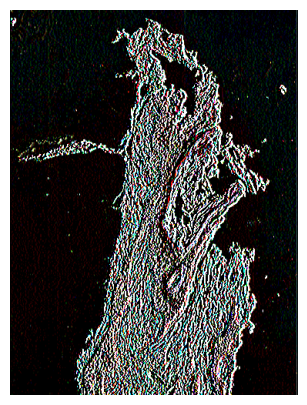

In [13]:
transformation = slideio.ScharrFilter()
transformation.depth = slideio.DataType.Int16
transformation.dx = 1
transformation.dy = 0
transformation.scale = 1.
transformation.delta = 0.
transformed_scene =scene.apply_transformation([transformation])
image = transformed_scene.read_block(size=(0,500))
# Display scene information
show_scene_info(transformed_scene)
show_image(image, 500)

## Laplacian filter
The Laplacian filter is a popular image enhancement and edge detection filter used in computer vision and image processing. It calculates the second-order derivatives of the image to identify areas of rapid intensity changes, such as edges or corners. Here are the parameters commonly used with the Laplacian filter in **SlideIO**:

- **depth** (`DataType`): This parameter specifies the desired depth of the output image. It determines the data type of the Laplacian filtered image. The available options are typically `DataType.Int16`, `DataType.Float32`, or `DataType.Float64`, depending on the desired precision and range of the output Laplacian image.

- **kernel_size** (`int`) : This parameter defines the size of the Laplacian kernel. It determines the neighborhood over which the Laplacian operation is applied. Common values for ksize are 1, 3, 5, or 7. A larger ksize value results in a more extensive neighborhood considered for the Laplacian operation, potentially capturing larger-scale edges or details.

- **scale** and **delta** (`double`): These parameters control the scaling and offset applied to the Laplacian response before it is converted to the output image type. The scale parameter scales the Laplacian response values by a specified factor, while the delta parameter represents an optional value added to the scaled response. These parameters can be adjusted to enhance the contrast and adjust the intensity range of the Laplacian filtered image.

The Laplacian filter is a versatile tool for detecting edges and enhancing image details. By adjusting the parameters ddepth, ksize, scale, delta, and borderType according to the characteristics of your images and the specific analysis task, you can effectively extract edges and features from the input image using the Laplacian filter.

Property,Value
Name,Image
File Path,./images/CMU-1-Small-Region.svs
"Size (Width, Height)","(2220, 2967)"
Number of Channels,3
Compression,Compression.Jpeg
Data Type,int16
Magnification,20.0
Resolution,"(4.99e-07, 4.99e-07)"
Z-Resolution,0.0
Time Resolution,0.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


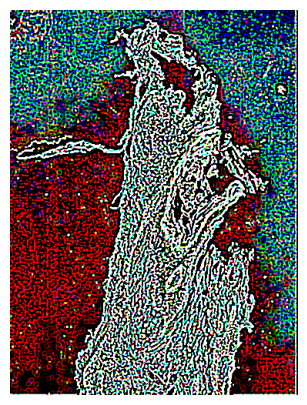

In [14]:
transformation = slideio.LaplacianFilter()
transformation.depth = slideio.DataType.Int16
transformation.kernel_size = 7
transformation.scale = 1.
transformation.delta = 0.
transformed_scene =scene.apply_transformation([transformation])
image = transformed_scene.read_block(size=(0,500))
# Display scene information
show_scene_info(transformed_scene)
show_image(image, 500)

## Bilateral filter
The bilateral filter is a non-linear edge-preserving smoothing filter commonly used in image processing and computer vision tasks. It effectively reduces noise while preserving the edges and fine details in an image. Here are the parameters typically used with the bilateral filter in **SlideIO**:

1. **diameter** (`int`): This parameter defines the diameter of each pixel neighborhood that is considered during filtering. A larger value of `diameter` means that more distant pixels will influence the filtering process, potentially resulting in stronger smoothing across larger regions. It is important to note that increasing the value of `diameter` also increases the computational complexity of the filtering operation.

2. **sigma_color** (`double`): This parameter controls the range of colors to be considered in the filtering process. A larger value of `sigma_color` means that colors farther away from the central pixel will have a larger influence on the filtering, resulting in a more extensive color smoothing effect. Conversely, a smaller value of `sigma_color` restricts the range of colors considered, leading to less color smoothing.

3. **sigma_space** (`double`): This parameter determines the spatial extent of the filtering process. A larger value of `sigma_space` means that pixels farther away from the central pixel will have a larger influence on the filtering, resulting in a more extensive spatial smoothing effect. A smaller value of `sigma_space` restricts the spatial range considered, leading to less spatial smoothing.

The bilateral filter is effective in reducing noise while preserving the edges and fine details of an image. By adjusting the parameters `diameter`, `sigma_color`, and `sigma_space` according to the characteristics of your image and the desired smoothing effect, you can effectively achieve the desired level of noise reduction while maintaining the important details in the image using the bilateral filter in **SlideIO**.

Property,Value
Name,Image
File Path,./images/CMU-1-Small-Region.svs
"Size (Width, Height)","(2220, 2967)"
Number of Channels,3
Compression,Compression.Jpeg
Data Type,uint8
Magnification,20.0
Resolution,"(4.99e-07, 4.99e-07)"
Z-Resolution,0.0
Time Resolution,0.0


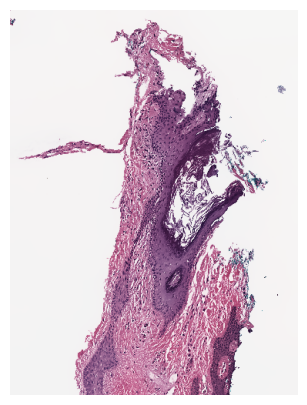

In [21]:
transformation = slideio.BilateralFilter()
transformation.diameter = 35
transformation.sigma_color = 55
transformation.sigma_space = 55
transformed_scene = scene.apply_transformation([transformation])
image = transformed_scene.read_block(size=(0,500))
# Display scene information
show_scene_info(transformed_scene)
show_image(image, 500)

## Canny filter
The Canny filter is an edge detection algorithm commonly used in computer vision and image processing applications. It aims to identify and highlight the edges present in an image. The Canny filter in **SlideIO** has the following parameters:

- **threshold1** (`double`): This parameter represents the lower threshold value for the hysteresis procedure, which is a step in the Canny edge detection algorithm. Any edge with an intensity gradient magnitude below this threshold will be suppressed. It is typically set to a lower value to capture weak edges.

- **threshold2** (`double`): This parameter represents the upper threshold value for the hysteresis procedure. Any edge with an intensity gradient magnitude above this threshold will be considered as a strong edge. Pixels with gradient magnitudes between threshold1 and threshold2 are treated as weak edges and are only retained if they are connected to strong edges.

- **aperture_size** (`int`): This parameter defines the size of the Sobel kernel used for computing the image gradients. It determines the scale at which the gradients are computed and affects the level of detail captured by the edge detection algorithm. Common values for apertureSize include 3, 5, and 7.

- **l2gradient** (`boolean`): This is a Boolean flag that indicates the method used for gradient magnitude calculation. If set to True, the Euclidean distance (L2 norm) is used to calculate the gradient magnitude. If set to False, the absolute value of the derivative in the gradient calculation is used (L1 norm).

The Canny filter applies a multi-stage process to detect edges in an image, including noise reduction, gradient calculation, non-maximum suppression, and hysteresis thresholding. By adjusting the `threshold1`, `threshold2`, `aperture_size`, and `l2gradient` parameters, you can control the sensitivity and accuracy of the edge detection algorithm and fine-tune it for different types of images and edge detection requirements.

Property,Value
Name,Image
File Path,./images/CMU-1-Small-Region.svs
"Size (Width, Height)","(2220, 2967)"
Number of Channels,1
Compression,Compression.Jpeg
Data Type,uint8
Magnification,20.0
Resolution,"(4.99e-07, 4.99e-07)"
Z-Resolution,0.0
Time Resolution,0.0


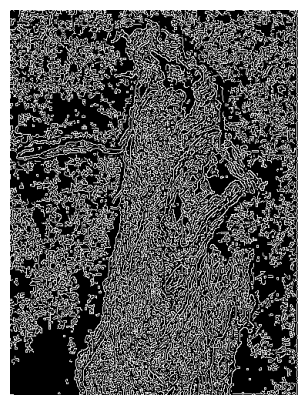

In [24]:
transformation = slideio.CannyFilter()
transformation.threshold1 = 10
transformation.threshold2 = 150
transformation.aperture_size = 5
transformation.l2gradient = False
transformed_scene = scene.apply_transformation([transformation])
image = transformed_scene.read_block(size=(0,500))
# Display scene information
show_scene_info(transformed_scene)
show_image(image, 500)

## Filter chains
The following code snippet shows how how to apply a sequence of 2 filters

Property,Value
Name,Image
File Path,./images/CMU-1-Small-Region.svs
"Size (Width, Height)","(2220, 2967)"
Number of Channels,1
Compression,Compression.Jpeg
Data Type,int16
Magnification,20.0
Resolution,"(4.99e-07, 4.99e-07)"
Z-Resolution,0.0
Time Resolution,0.0


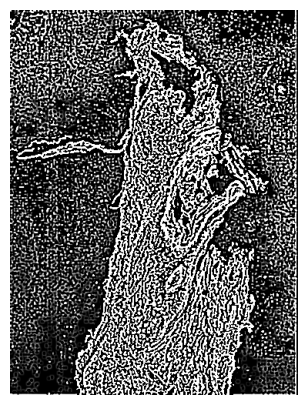

In [26]:
transformation1 = slideio.ColorTransformation()
transformation1.color_space = slideio.ColorSpace.GRAY
transformation2 = slideio.LaplacianFilter()
transformation2.depth = slideio.DataType.Int16
transformation2.kernel_size = 7
transformation2.scale = 1.
transformation2.delta = 0.
transformed_scene =scene.apply_transformation([transformation1, transformation2])
image = transformed_scene.read_block(size=(0,500))
# Display scene information
show_scene_info(transformed_scene)
show_image(image, 500)